## About

Working with energy efficiency dataset related to residential buildings. Based on publication ['Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools'](https://scholar.google.com/scholar?hl=en&q=A.+Tsanas%2C+A.+Xifara%3A+%27Accurate+quantitative+estimation+of+energy+performance+of+residential+buildings+using+statistical+machine+learning+tools%27%2C+Energy+and+Buildings%2C+Vol.+49%2C+pp.+560-567%2C+2012&btnG=&as_sdt=1%2C5&as_sdtp=) by A. Tsanas and A. Xifara published in Energy and Buildings, Vol. 49, pp. 560-567, 2012.

### Links

* [Energy efficiency Data Set ](https://archive.ics.uci.edu/ml/datasets/Energy+efficiencys)


### Description of Dataset

#### Data Set Information

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
* X4	Roof Area 
* X5	Overall Height 
* X6	Orientation 
* X7	Glazing Area 
* X8	Glazing Area Distribution 
* y1	Heating Load 
* y2	Cooling Load



### Loading Data

The first step is always a data loading. Before loading data was converted from original Excel file into CSV.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

dataset = pd.read_csv('data/ENB2012-data-uci.csv', sep=';')
dataset.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Data Description

In [2]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009568438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000095A7748>]], dtype=object)

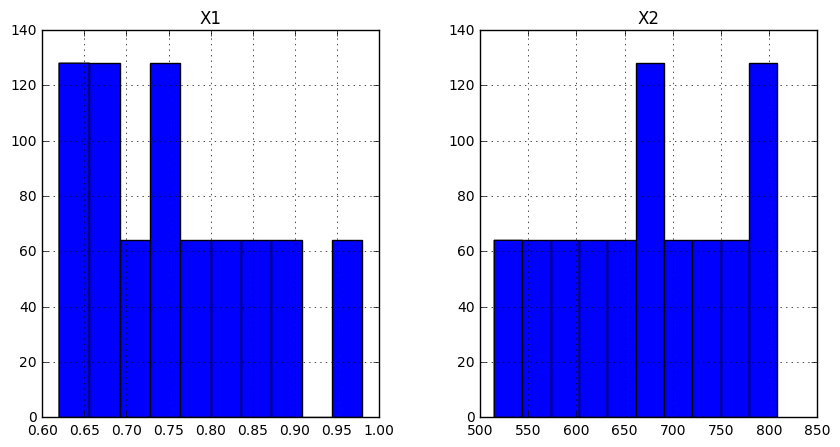

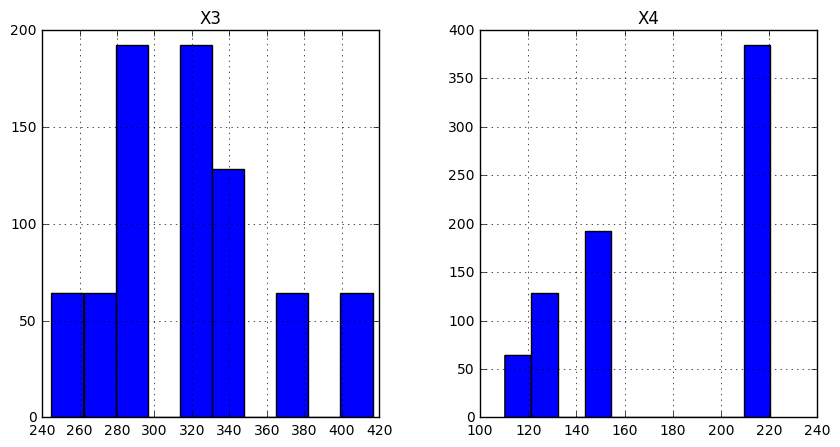

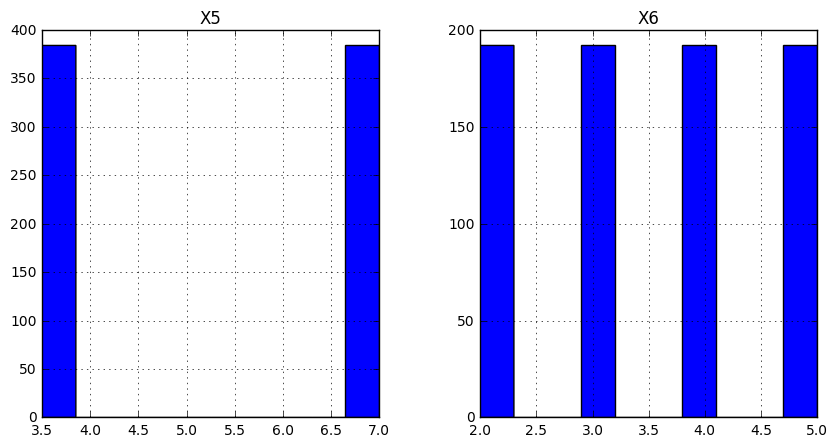

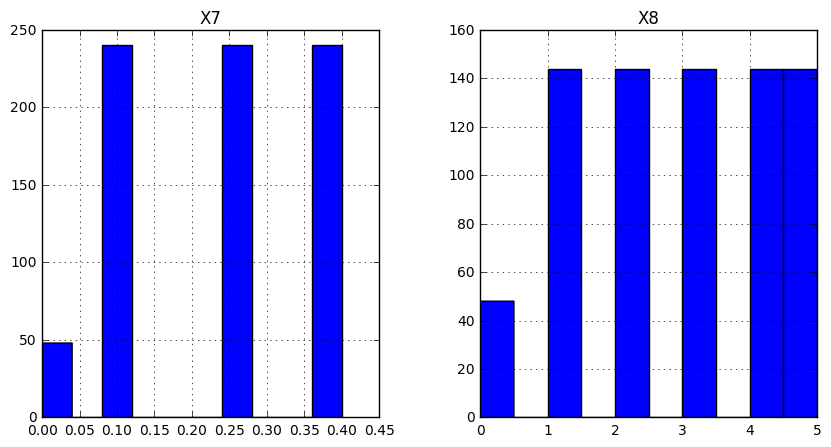

In [3]:
dataset[["X1", "X2"]].hist(bins=10, figsize = (10,5))
dataset[["X3", "X4"]].hist(bins=10, figsize = (10,5))
dataset[["X5", "X6"]].hist(bins=10, figsize = (10,5))
dataset[["X7", "X8"]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AEF9BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3E7828>]], dtype=object)

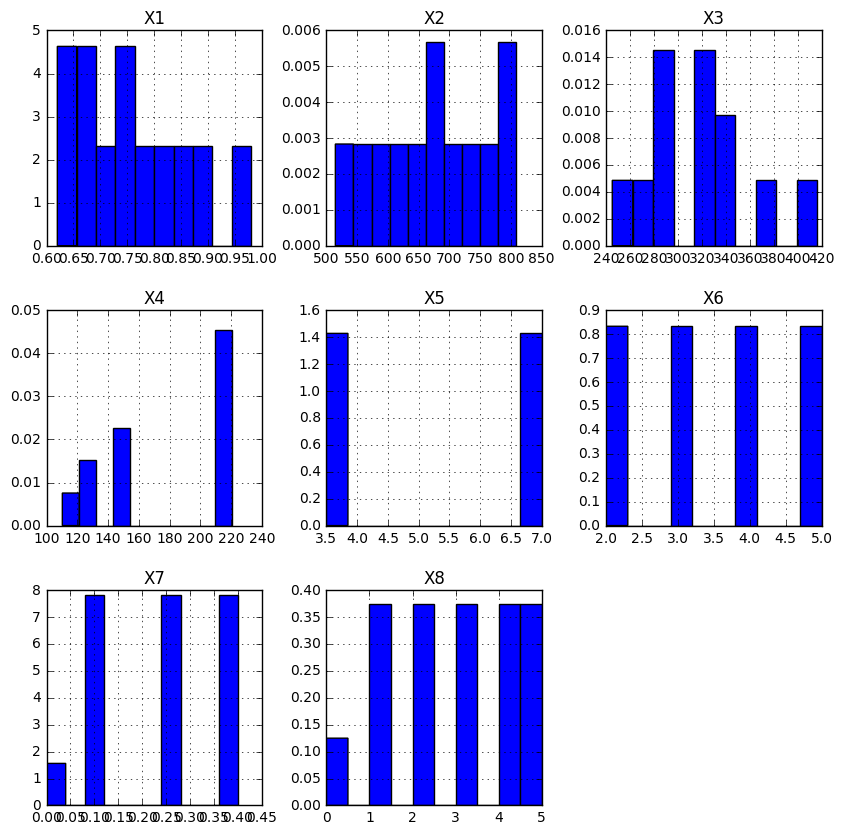

In [4]:
# different view of histograms
dataset[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].hist(bins=10, figsize = (10,10) , normed=1)

Plotting target/output variables in form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B46AF60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE84A58>]], dtype=object)

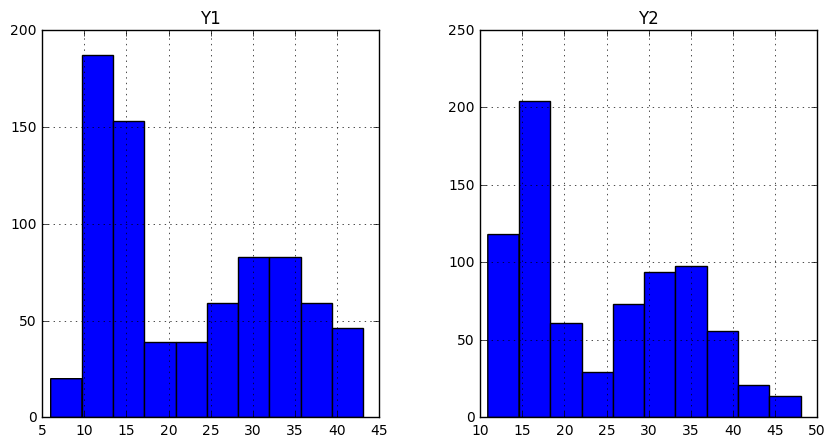

In [5]:
dataset[["Y1", "Y2"]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000094A7160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000094E29E8>]], dtype=object)

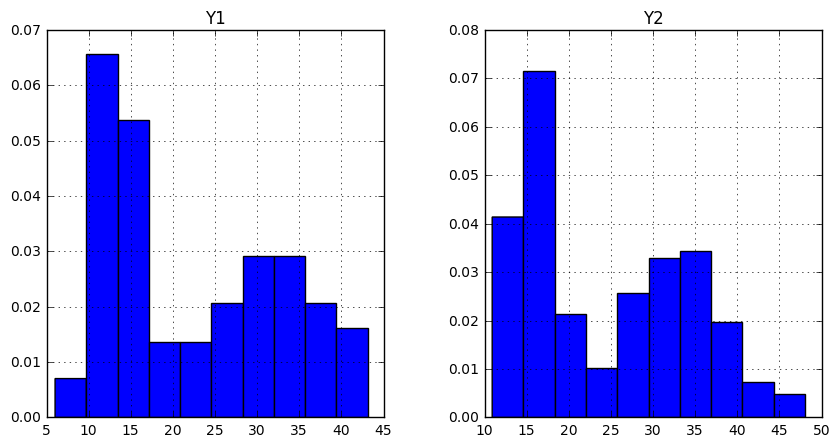

In [6]:
# normalized
dataset[["Y1", "Y2"]].hist(bins=10, figsize = (10,5), normed=1)

### Data Preprocessing

#### Normalizing Data in Dataset - Multiple Approaches

In [7]:
def normalize_sklearn(dataset):
    """normalization of an input dataset"""
    from sklearn import preprocessing
    x = dataset.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame(x_scaled)
    return df_norm

def normalize_manually(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_norm_v1 = normalize_sklearn(dataset)
df_norm_v2 = normalize_manually(dataset)

In [8]:
df_norm_v1.head(10)
#df_norm_v1.tail(15)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
5,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,0.0,0.0,0.416554,0.389981
6,0.777778,0.166667,0.428571,0.111111,1.0,0.666667,0.0,0.0,0.396333,0.384056
7,0.777778,0.166667,0.428571,0.111111,1.0,1.000000,0.0,0.0,0.368563,0.503636
8,0.666667,0.250000,0.285714,0.333333,1.0,0.000000,0.0,0.0,0.363710,0.441691
9,0.666667,0.250000,0.285714,0.333333,1.0,0.333333,0.0,0.0,0.375843,0.298142


In [9]:
df_norm_v2.head(10)
#df_norm_v2.tail(15)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
5,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,0.0,0.0,0.416554,0.389981
6,0.777778,0.166667,0.428571,0.111111,1.0,0.666667,0.0,0.0,0.396333,0.384056
7,0.777778,0.166667,0.428571,0.111111,1.0,1.000000,0.0,0.0,0.368563,0.503636
8,0.666667,0.250000,0.285714,0.333333,1.0,0.000000,0.0,0.0,0.363710,0.441691
9,0.666667,0.250000,0.285714,0.333333,1.0,0.333333,0.0,0.0,0.375843,0.298142


#### Comparing Normalization Approaches

Replacing all values that are smaller then particular epsilon (my own choice) with zeros and counting total amount of zeros in each collumn.

In [11]:
#from pandas.util.testing import assert_frame_equal
#assert_frame_equal(df_norm, df_norm_v2)

def compare_normalization_approaches(df_norm_v1, df_norm_v2):
    """Replacing all values that are smaller then particular epsilon (my own choice) 
       with zeros and counting total amount of zeros in each collumn.
    """
    EPSILON = 0.000000000000001
    comparison_array = df_norm_v1.values - df_norm_v2.values
    comparison_array[comparison_array < EPSILON] = 0
    print ('Total number of zeros in earch row (in each should be 768)')
    print ((comparison_array == 0).astype(int).sum(axis=0))
    
compare_normalization_approaches(df_norm_v1, df_norm_v2)

Total number of zeros in earch row (in each should be 768)
[768 768 768 768 768 768 768 768 768 768]
